<a href="https://colab.research.google.com/github/alanperez/HLT-Portfolio/blob/main/Text-Classification2/TextClassification2_AXP2000075.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alan Perez | AXP200075 | Text Classification 2

The dataset I used was the Twitter Sent Analysis, should be able to predict the sentiment of tweets

https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [ ]:
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models, preprocessing, datasets
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
#load data

# target column 2 which is sentiment and 3 which is tweet content
data = pd.read_csv('twitter.csv',usecols=[2,3], names=['sentiment', 'tweet_content'],encoding='latin-1')

# check for NaN values
print(data.isna().sum())
# check if there  are unexpected types

print(data.applymap(type))
# replace NaN with empty str
data.fillna('', inplace=True)

# convert columns to string type
data['sentiment'] = data['sentiment'].astype(str)
data['tweet_content'] = data['tweet_content'].astype(str)
data = data.astype(str)
display(data)

# check the data types of each column
print('data dtypes: ', data.dtypes)

print('shape rows column: ', data.shape)
print('head : ', data.head)
print('tail: ', data.tail)

# check for NaN values
print(data.isna().sum())
print(data.columns)

sentiment          0
tweet_content    686
dtype: int64
           sentiment  tweet_content
0      <class 'str'>  <class 'str'>
1      <class 'str'>  <class 'str'>
2      <class 'str'>  <class 'str'>
3      <class 'str'>  <class 'str'>
4      <class 'str'>  <class 'str'>
...              ...            ...
74677  <class 'str'>  <class 'str'>
74678  <class 'str'>  <class 'str'>
74679  <class 'str'>  <class 'str'>
74680  <class 'str'>  <class 'str'>
74681  <class 'str'>  <class 'str'>

[74682 rows x 2 columns]


,sentiment,tweet_content
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
74677,Positive,Just realized that the Windows partition of my...
74678,Positive,Just realized that my Mac window partition is ...
74679,Positive,Just realized the windows partition of my Mac ...
74680,Positive,Just realized between the windows partition of...


data dtypes:  sentiment        object
tweet_content    object
dtype: object
shape rows column:  (74682, 2)
head :  <bound method NDFrame.head of       sentiment                                      tweet_content
0      Positive  im getting on borderlands and i will murder yo...
1      Positive  I am coming to the borders and I will kill you...
2      Positive  im getting on borderlands and i will kill you ...
3      Positive  im coming on borderlands and i will murder you...
4      Positive  im getting on borderlands 2 and i will murder ...
...         ...                                                ...
74677  Positive  Just realized that the Windows partition of my...
74678  Positive  Just realized that my Mac window partition is ...
74679  Positive  Just realized the windows partition of my Mac ...
74680  Positive  Just realized between the windows partition of...
74681  Positive  Just like the windows partition of my Mac is l...

[74682 rows x 2 columns]>
tail:  <bound method NDF

# Graph Visualization

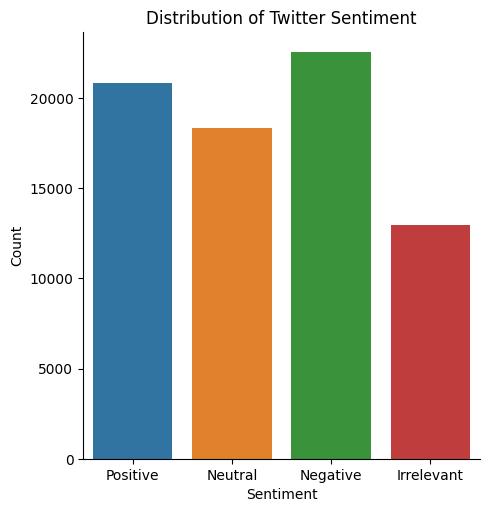

In [ ]:
import matplotlib.pyplot as plt
sb.catplot(x="sentiment", kind="count", data=data)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Twitter Sentiment')
plt.show()


# Sequential Model

Divide and Train sets

In [ ]:
#set seed for reproducibility
np.random.seed(1234)
i = np.random.rand(len(data)) < 0.8
train = data[i]
test = data[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (59733, 2)
test data size:  (14949, 2)


In [ ]:
# x and y

num_labels = 2
vocab_size = 10000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.tweet_content)

x_train = tokenizer.texts_to_matrix(train.tweet_content, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.tweet_content, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.sentiment)
y_train = encoder.transform(train.sentiment)
y_test = encoder.transform(test.sentiment)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (59733, 10000) (59733,)
test shapes: (14949, 10000) (14949,)
test first five labels: [3 3 3 3 1]


In [ ]:
# fit model 

model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
538/538 [==============================] - 8s 14ms/step - loss: -109.3246 - accuracy: 0.3065 - val_loss: -449.5832 - val_accuracy: 0.2680
Epoch 2/30
538/538 [==============================] - 6s 11ms/step - loss: -876.6799 - accuracy: 0.3082 - val_loss: -1886.0970 - val_accuracy: 0.2680
Epoch 3/30
538/538 [==============================] - 7s 12ms/step - loss: -2355.4119 - accuracy: 0.3083 - val_loss: -4105.3730 - val_accuracy: 0.2680
Epoch 4/30
538/538 [==============================] - 6s 11ms/step - loss: -4407.6631 - accuracy: 0.3083 - val_loss: -6977.9624 - val_accuracy: 0.2680
Epoch 5/30
538/538 [==============================] - 7s 13ms/step - loss: -6961.2695 - accuracy: 0.3083 - val_loss: -10438.0020 - val_accuracy: 0.2680
Epoch 6/30
538/538 [==============================] - 6s 11ms/step - loss: -9977.5928 - accuracy: 0.3084 - val_loss: -14451.6611 - val_accuracy: 0.2680
Epoch 7/30
538/538 [==============================] - 7s 13ms/step - loss: -13413.3643 - accura

In [ ]:
# evaluate

score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

print(score)

150/150 [==============================] - 1s 4ms/step - loss: -193450.0000 - accuracy: 0.3028
Accuracy:  0.3028296232223511
[-193450.0, 0.3028296232223511]


In [ ]:
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]

468/468 [==============================] - 1s 2ms/step


In [ ]:
pred[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
pred_labels[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels, average='weighted'))
print('recall score: ', recall_score(y_test, pred_labels, average='weighted'))
print('f1 score: ', f1_score(y_test, pred_labels, average='weighted'))

accuracy score:  0.3028296207104154
precision score:  0.26307169291211835
recall score:  0.3028296207104154
f1 score:  0.14376181790687412


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RNN

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32
# pad the data to maxlen
train_data = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 320,065
Trainable params: 320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
# Define the model
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:


# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
# train

history = model.fit(train_data,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
374/374 [==============================] - 12s 29ms/step - loss: -2078.7622 - accuracy: 0.2895 - val_loss: -7387.2837 - val_accuracy: 0.3528
Epoch 2/10
374/374 [==============================] - 11s 30ms/step - loss: -21262.9746 - accuracy: 0.2895 - val_loss: -44272.4336 - val_accuracy: 0.3528
Epoch 3/10
374/374 [==============================] - 11s 30ms/step - loss: -79921.0703 - accuracy: 0.2895 - val_loss: -133940.6406 - val_accuracy: 0.3528
Epoch 4/10
374/374 [==============================] - 11s 30ms/step - loss: -199047.2344 - accuracy: 0.2895 - val_loss: -298529.0312 - val_accuracy: 0.3528
Epoch 5/10
374/374 [==============================] - 14s 37ms/step - loss: -400794.6250 - accuracy: 0.2895 - val_loss: -560864.8750 - val_accuracy: 0.3528
Epoch 6/10
374/374 [==============================] - 11s 30ms/step - loss: -706194.1875 - accuracy: 0.2895 - val_loss: -943666.4375 - val_accuracy: 0.3528
Epoch 7/10
374/374 [==============================] - 11s 30ms/step - l

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(test_data)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

468/468 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2653
           1       0.30      1.00      0.46      4493
           2       0.00      0.00      0.00      3626
           3       0.00      0.00      0.00      4177

    accuracy                           0.30     14949
   macro avg       0.08      0.25      0.12     14949
weighted avg       0.09      0.30      0.14     14949



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LTSM

In [ ]:
# build a model with LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))



model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:


# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train

history = model.fit(train_data,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
374/374 [==============================] - 142s 374ms/step - loss: -7.8839 - accuracy: 0.2895 - val_loss: -12.5662 - val_accuracy: 0.3528
Epoch 2/10
374/374 [==============================] - 136s 362ms/step - loss: -15.7548 - accuracy: 0.2895 - val_loss: -20.5482 - val_accuracy: 0.3528
Epoch 3/10
374/374 [==============================] - 145s 388ms/step - loss: -23.3606 - accuracy: 0.2895 - val_loss: -28.5352 - val_accuracy: 0.3528
Epoch 4/10
374/374 [==============================] - 135s 362ms/step - loss: -30.9649 - accuracy: 0.2895 - val_loss: -36.5198 - val_accuracy: 0.3528
Epoch 5/10
374/374 [==============================] - 139s 371ms/step - loss: -38.5526 - accuracy: 0.2895 - val_loss: -44.4865 - val_accuracy: 0.3528
Epoch 6/10
374/374 [==============================] - 135s 362ms/step - loss: -46.1822 - accuracy: 0.2895 - val_loss: -52.5017 - val_accuracy: 0.3528
Epoch 7/10
374/374 [==============================] - 134s 359ms/step - loss: -53.7950 - accuracy: 0.

In [ ]:
pred = model.predict(test_data)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

468/468 [==============================] - 23s 48ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2653
           1       0.30      1.00      0.46      4493
           2       0.00      0.00      0.00      3626
           3       0.00      0.00      0.00      4177

    accuracy                           0.30     14949
   macro avg       0.08      0.25      0.12     14949
weighted avg       0.09      0.30      0.14     14949



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM - Attempt #2

In [ ]:
# build a model with LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))



model.summary()

In [ ]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
pred = model.predict(x_test, y_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_train, pred))

# GRU

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.GRU(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train

history = model.fit(train_data,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
374/374 [==============================] - 134s 350ms/step - loss: -7.8998 - accuracy: 0.2895 - val_loss: -12.7450 - val_accuracy: 0.3528
Epoch 2/10
374/374 [==============================] - 133s 356ms/step - loss: -15.9390 - accuracy: 0.2895 - val_loss: -20.7263 - val_accuracy: 0.3528
Epoch 3/10
374/374 [==============================] - 129s 344ms/step - loss: -23.5711 - accuracy: 0.2895 - val_loss: -28.7289 - val_accuracy: 0.3528
Epoch 4/10
374/374 [==============================] - 137s 366ms/step - loss: -31.1776 - accuracy: 0.2895 - val_loss: -36.7223 - val_accuracy: 0.3528
Epoch 5/10
374/374 [==============================] - 132s 354ms/step - loss: -38.7615 - accuracy: 0.2895 - val_loss: -44.7269 - val_accuracy: 0.3528
Epoch 6/10
374/374 [==============================] - 131s 351ms/step - loss: -46.3505 - accuracy: 0.2895 - val_loss: -52.7018 - val_accuracy: 0.3528
Epoch 7/10
374/374 [==============================] - 132s 354ms/step - loss: -54.0266 - accuracy: 0.

In [ ]:
pred = model.predict(test_data)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

468/468 [==============================] - 26s 54ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2653
           1       0.30      1.00      0.46      4493
           2       0.00      0.00      0.00      3626
           3       0.00      0.00      0.00      4177

    accuracy                           0.30     14949
   macro avg       0.08      0.25      0.12     14949
weighted avg       0.09      0.30      0.14     14949



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis

I've noticed that the accuracy when using different approaches the results where practicially the same when scoring the accurracy. I believe I need to experiemnt a lot more with the model. The sequential model did the best out of all of them, but the low accuracy may be due to the dataset